# Plotting 2 - Scatter Plots

# Announcements - Wednesday, December 7
* Download the files on Canvas->Files->mikes_lecture_notes->lec37_plotting_2
* [**Course evaluations**](https://aefis.wisc.edu) available now.
  * 955 = 30% response rate
  * 330 = 19% response rate
* Projects
  * Everything due Wednesday December 14
  * **Late days may not be used for P13**
  * P12 due today
  * Today is the last day to request regrade for projects P2 - P9
* [Peer Mentor Application Form](https://docs.google.com/forms/d/e/1FAIpQLSdU6HsKWLGS_drL5RarcYcA2EXCRMDzlVaW0snsZKbpSrmXGQ/viewform?vc=0&c=0&w=1&flr=0)
* Final Exam
  * December 19, 5:05 - 7:05 pm  (McBurney 4:30 to 8:30 pm)
  * Please fill out the [exam conflict form](https://cs220.cs.wisc.edu/f22/surveys.html)
    * Only 13 students from my sections have filled this out???
    * Conflict form will be taken down on **Wednesday, December 14**
        * There will be a new form for illness/emergencies
    * McBurney accomodation conflicts need to make appointment with T&E by **Friday, December 9**.
    * Scheduled alternate time is December 20, 10am to 12pm

* [Zoom Link](https://uwmadison.zoom.us/j/9741859842?pwd=OURuZnZuL0lhYlJkNVJHR1pLeUQwUT09)
  * Projector Only, No Audio, The class is not livestreamed, 9:55 lecture only 


In [ ]:
# Run this cell to make the emphasized text red and use the full width of the screen
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style> <style>.container {width:100% !important; }</style>')

In [49]:
%matplotlib inline

In [50]:
import pandas as pd
from pandas import DataFrame, Series

import sqlite3
import os

import matplotlib
# new import statement
from matplotlib import pyplot as plt

import requests
matplotlib.rcParams["font.size"] = 14

#### Wrapping up bus dataset example

#### What are the top routes, and how many people ride them daily?

In [51]:
path = "bus.db"
# assert existence of path
assert os.path.exists(path)

# establish connection to bus.db
conn = sqlite3.connect(path)

AssertionError: 

In [52]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)

df.head(2)

NameError: name 'conn' is not defined

In [53]:
# let's extract daily column from df
df["daily"].head(3)

KeyError: 'daily'

In [ ]:
# let's create a bar plot from daily column Series
df["daily"].plot.bar()

# Oops wrong x-axis labels!

In [ ]:
df = df.set_index("Route")
df.head(4)

In [ ]:
# df.plot.bar()

# let's plot for top 5 routes alone
df[:5].plot.bar()

In [ ]:
# let's use slicing to aggregate the rest of the data
sum_of_other = df["daily"][5:].sum()
print(type(sum_of_other))
top_five = df["daily"][:5]
top_five
top_five["other"] = sum_of_other
top_five

In [ ]:
# let's plot the bars
ax = (top_five / 1000).plot.bar(color = "k")
ax.set_ylabel("Rides / Day (Thousands)")
# None

In [ ]:
conn.close()

### IRIS dataset: http://archive.ics.uci.edu/ml/datasets/iris
- This set of data is used in beginning Machine Learning Courses
- You can train a ML algorithm to use the values to predict the class of iris
- Dataset link: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

#### Warmup 1:  Downloading IRIS dataset (https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

In [ ]:
# use requests to get this URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get(url)

# check that the request was successful
response.raise_for_status()

# open a file called "iris.csv" for writing the data locally
file_obj = open("iris.csv", "w")

# write the text of response to the file object
file_obj.write(response.text)

# close the file object
file_obj.close()

# Look at the file you downloaded. Is there anything wrong with it?

#### Warmup 2: Making a DataFrame

In [ ]:
# read the "iris.csv" file into a Pandas dataframe
iris_df = pd.read_csv("iris.csv")

# display the head of the data frame
iris_df.head()

# dir(pd)

#### Warmup 3: Our CSV file has no header. Let's add column names.
- Refer to the documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [54]:
# Attribute Information:
# 1. sepal length in cm
# 2. sepal width in cm
# 3. petal length in cm
# 4. petal width in cm
# 5. class: Iris Setosa, Iris Versicolour, Iris Virginica

# These should be our headers 
column_names = ["sep-length", "sep-width", "pet-length", "pet-width", "class"]

iris_df = pd.read_csv("iris.csv", names=column_names)
iris_df.head()



,sep-length,sep-width,pet-length,pet-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Warmup 4: Connect to our database version of this data!

In [55]:
iris_conn = sqlite3.connect("iris-flowers.db")
pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'", iris_conn)

,type,name,tbl_name,rootpage,sql
0,table,iris,iris,2,"CREATE TABLE ""iris"" (\n""sep-length"" REAL,\n ""..."


#### Warmup 5: Using SQL, get the 10 'Iris-setosa' flowers with the longest sepal length.
Break any ties by ordering by the shortest sepal width.

In [56]:
pd.read_sql("""
    SELECT *
    FROM iris
    WHERE class = "Iris-setosa"
    ORDER BY "sep-length" DESC
    LIMIT 10
""", iris_conn)

,sep-length,sep-width,pet-length,pet-width,class
0,5.8,4.0,1.2,0.2,Iris-setosa
1,5.7,4.4,1.5,0.4,Iris-setosa
2,5.7,3.8,1.7,0.3,Iris-setosa
3,5.5,4.2,1.4,0.2,Iris-setosa
4,5.5,3.5,1.3,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,5.4,3.7,1.5,0.2,Iris-setosa
7,5.4,3.9,1.3,0.4,Iris-setosa
8,5.4,3.4,1.7,0.2,Iris-setosa
9,5.4,3.4,1.5,0.4,Iris-setosa


# Lecture 36:  Scatter Plots
**Learning Objectives**
- Set the marker, color, and size of scatter plot data
- Calculate correlation between DataFrame columns
- Use subplots to group scatterplot data

## Set the marker, color, and size of scatter plot data

To start, let's look at some made-up data about Trees.
The city of Madison maintains a database of all the trees they care for.

In [57]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
# turn this list of dictionaries into a pandas dataframe
# predict the structure of this dataframe - column names and row indexes?
df = pd.DataFrame(trees)

# print the first 3 entries
df.head(3)

,age,height,diameter
0,1,1.5,0.8
1,1,1.9,1.2
2,1,1.8,1.4


### Scatter Plots
We can make a scatter plot of a DataFrame using the following function...

`df_name.plot.scatter(x = "x_col_name", y = "y_col_name", \
                     color = "red", marker = "*", s = 50)`

Plot the trees data comparing a tree's age to its height...
 - What is `df_name`?
 - What is `x_col_name`?
 - What is `y_col_name`?

<AxesSubplot:xlabel='age', ylabel='height'>

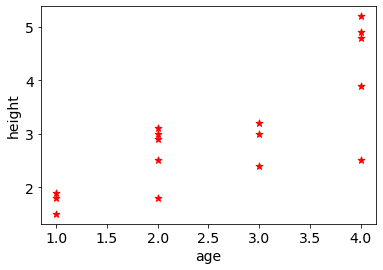

In [58]:
# TODO: change y to diameter
df.plot.scatter(x = "age", y = "height", \
                     color = "red", marker = "*", s = 50)

Now plot with a little more beautification...
 - Use a new [color](https://matplotlib.org/3.5.0/_images/sphx_glr_named_colors_003.png)
 - Use a type of [marker](https://matplotlib.org/stable/api/markers_api.html)
 - Change the size (any int)

In [59]:
# help(pd.DataFrame.plot.scatter)
help(pd.DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pi

<AxesSubplot:xlabel='age', ylabel='height'>

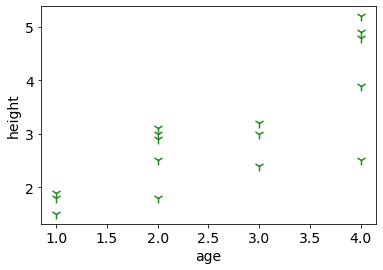

In [60]:
# Plot with some more beautification options.
df.plot.scatter(x = "age", y = "height", color = "forestgreen",  marker = "1", s = 100) 
# D for diamond

In [61]:
# Add a title to your plot.
ax = trees_df.plot.scatter(x = "age", y = "height", color = "r", marker = "D", s = 50) 
# D for diamond
ax.set_title("Tree Age vs Height")

NameError: name 'trees_df' is not defined

#### Correlation

In [62]:
# What is the correlation between our DataFrame columns?
corr_df = trees_df.corr()
corr_df

NameError: name 'trees_df' is not defined

In [63]:
# What is the correlation between age and height (don't use .iloc)
# Using index in this case isn't considered as hardcoding
corr_df['age']['height']

NameError: name 'corr_df' is not defined

### Variating Stylistic Parameters

<AxesSubplot:xlabel='age', ylabel='height'>

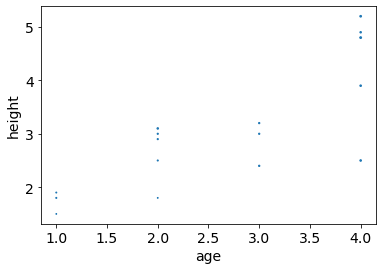

In [64]:
# Option 1:
df.plot.scatter(x = "age", y = "height",  marker = "H", s = "diameter")

<AxesSubplot:xlabel='age', ylabel='height'>

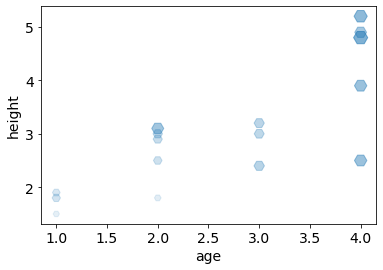

In [65]:
# Option 2:
# this way allows you to make it bigger
df.plot.scatter(x = "age", y = "height", marker = "H", s = df["diameter"] * 50, \
                alpha = df["diameter"]/7) 

## Use subplots to group scatterplot data

### Re-visit the Iris Data


In [66]:
iris_df

,sep-length,sep-width,pet-length,pet-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### How do we create a *scatter plot* for various *class types*?
First, gather all the class types.

In [67]:
# In Pandas
varietes = list(set(iris_df["class"]))
varietes

['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

In [68]:
# In SQL
varietes = list(pd.read_sql("""
    SELECT DISTINCT class
    FROM iris
""", iris_conn)["class"])
varietes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In reality, you can choose to write Pandas or SQL queries (or a mix of both!). For the rest of this lecture, we'll use Pandas.

In [69]:
# If you want to continue using SQL instead, don't close the connection!
iris_conn.close()

<AxesSubplot:xlabel='pet-length', ylabel='pet-width'>

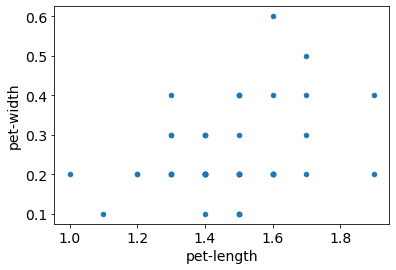

In [70]:
# Change this scatter plot so that the data is only for class ='Iris-setosa'
iris_df[ iris_df["class"] == "Iris-setosa"   ].plot.scatter(x = "pet-length", \
                                                            y = "pet-width")

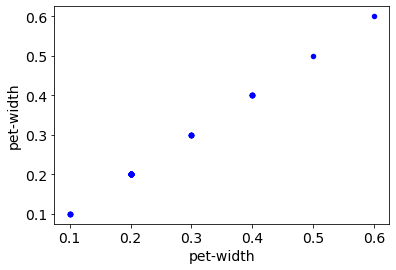

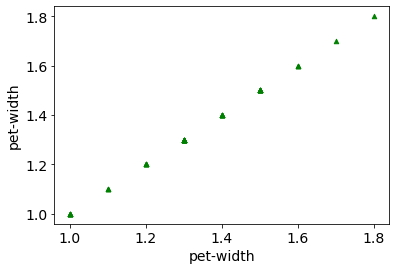

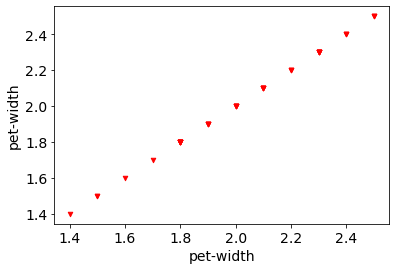

In [71]:
# Write a for loop that iterates through each variety in classes
# and makes a plot for only that class

# For each class add a color and a marker style
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]

for i in range(len(varietes)):
    df =iris_df[iris_df['class']== varietes[i]]
    df.plot.scatter(x='pet-width',y='pet-width',c=colors[i],marker=markers[i])

Did you notice that it made 3 plots?!?! What's decieving about this?

### We can make Subplots in plots, called an AxesSubplot, keyword ax
1. if AxesSuplot ax passed, then plot in that subplot
2. if ax is None, create a new AxesSubplot
3. return AxesSubplot that was used

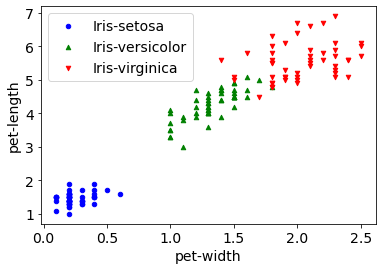

In [73]:
# complete this code to make 3 plots in one

plot_area = None   # don't change this...look at this variable in line 12
colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]
for i in range(len(varietes)):
    df = iris_df[iris_df['class']==varietes[i]]
    plot_area = df.plot.scatter(x='pet-width',y='pet-length',label=varietes[i],c=colors[i],marker=markers[i],ax=plot_area)

### Let's focus on "Iris-virginica" data

In [38]:
iris_virginica = iris_df[iris_df['class']=='Iris-virginica']

assert(len(iris_virginica) == 50)
iris_virginica.head()

,sep-length,sep-width,pet-length,pet-width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


<AxesSubplot:xlabel='pet-width', ylabel='pet-length'>

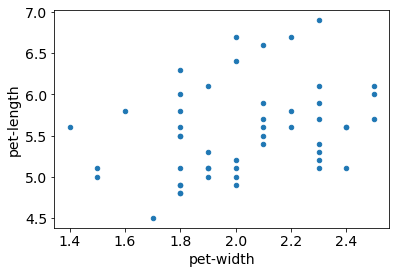

In [39]:
iris_virginica.plot.scatter(x = "pet-width", y = "pet-length")

### Let's learn about *xlim* and *ylim*
- Allows us to set x-axis and y-axis limits
- Takes either a single value (LOWER-BOUND) or a tuple containing two values (LOWER-BOUND, UPPER-BOUND)
- You need to be careful about setting the UPPER-BOUND

(0.0, 6.0)

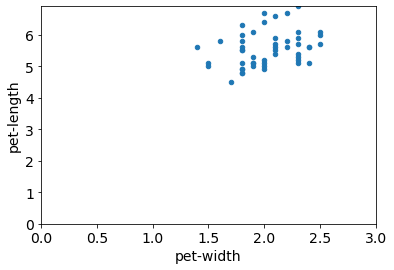

In [48]:
iris_virginica.plot.scatter(x = "pet-width", y = "pet-length", xlim = (0.0,3.0), ylim = (0,iris_virginica['pet-length'].max()))
ax.get_xlim()
ax.get_ylim()

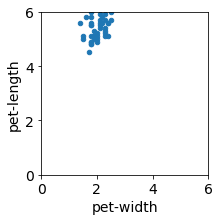

In [40]:
ax = iris_virginica.plot.scatter(x = "pet-width", y = "pet-length",
                    xlim = (0, 6), ylim = (0, 6),
                    figsize = (3, 3))

# What is wrong with this plot?

What is the maximum pet-len?

In [ ]:
ax.get_ylim()

Let's include assert statements to make sure we don't crop the plot!

In [ ]:
ax = iris_virginica.plot.scatter(x = "pet-width", y = "pet-length",
                     xlim = (0, 6), ylim = (0, 6),
                     figsize = (3, 3))
assert iris_virginica["pet-length"].max() <= ax.get_ylim()[1]

### Now let's try all 4 assert statements

```
assert iris_virginica[ax.get_xlabel()].min() >= ax.get_xlim()[0]
assert iris_virginica[ax.get_xlabel()].max() <= ax.get_xlim()[1]
assert iris_virginica[ax.get_ylabel()].min() >= ax.get_ylim()[0]
assert iris_virginica[ax.get_ylabel()].max() <= ax.get_ylim()[1]
```

In [ ]:
ax = iris_virginica.plot.scatter(x = "pet-width", y = "pet-length",
                     xlim = (0, 7), ylim = (0, 7),
                     figsize = (3, 3))
assert iris_virginica[ax.get_xlabel()].min() >= ax.get_xlim()[0]
assert iris_virginica[ax.get_xlabel()].max() <= ax.get_xlim()[1]
assert iris_virginica[ax.get_ylabel()].min() >= ax.get_ylim()[0]
assert iris_virginica[ax.get_ylabel()].max() <= ax.get_ylim()[1]

### Time-Permitting
Plot this data in an interesting/meaningful way & identify any correlations.

In [ ]:
students = pd.DataFrame({
    "name": [
        "Cole",
        "Cynthia",
        "Alice",
        "Seth"
    ],
    "grade": [
        "C",
        "AB",
        "B",
        "BC"
    ],
    "gpa": [
        2.0,
        3.5,
        3.0,
        2.5
    ],
    "attendance": [
        4,
        11,
        10,
        6
    ],
    "height": [
        68,
        66,
        60,
        72
    ]
})
students

In [ ]:
# Min, Max, and Overall Difference in Student Height
min_height = students["height"].min()
max_height = students["height"].max()
diff_height = max_height - min_height

# Normalize students heights on a scale of [0, 1] (black to white)
height_colors = (students["height"] - min_height) / diff_height

# Normalize students heights on a scale of [0, 0.5] (black to gray)
height_colors = height_colors / 2 

# Color must be a string (e.g. c='0.34')
height_colors = height_colors.astype("string")

height_colors

In [ ]:
students.plot.scatter(x="attendance", y="gpa", c=height_colors)

In [ ]:
students.corr()